# EXPLORATORY DATA ANALYSIS ON NETFLIX CONTENT

# Index

1. Objectives
2. Libraries
3. Data Overview
   * First Insight
   * Feature Inspection
4. Missing Values
5. New Features
6. Data Visualization
   * Content type on Netflix
   * Top 5 or 10 content by Country on Netflix
   * Top 20 content by Country on Netflix
   * Content added on Netflix over time
   * Content rating on Netflix
   * Content released over time
   * TV shows Released vs Added on Netflix over time
   * Movies Released vs Added on Netflix over time
7. Insight Summary
8. Further Analysis
9. Author
10. Change Log


# Objectives

The goal of this exercise is to do exploratory data analysis (EDA) on a Netflix dataset to understand what type of information we can extract from it.

# Libraries

For simplicity, we'll create visualizations using only Pyplot.

In [1]:
import pandas as pd
import numpy as np
# to count hashable objects
from collections import Counter
# data visualization
import matplotlib.pyplot as plt

# Data Overview

In [2]:
# Load csv into dataframe
netflix_df = pd.read_csv("Leadzai_DS_r&s_Exercise01_netflix.csv")
# Check number of rows and columns
print('This dataset has', netflix_df.shape[0], 'rows and', netflix_df.shape[1], 'columns.')
# Show first 10 rows
netflix_df.head(10)

This dataset has 8807 rows and 12 columns.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
# Missing values per feature
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We can already see there are some missing values in the dataset. Let's see the data types and the amount of non-null values:

In [4]:
# Sumary of the dataframe
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The data seems to be in a correct format, since only release_year is a numeric value (integer in this case) and the rest are treated as strings (objects for Pandas). We can change "type" to categorical.

In [5]:
netflix_df['type'] = pd.Categorical(netflix_df['type'])

Pandas reads empty cells in a csv as NaN (Not a Number) because of computational speed and convenience. There are various reasons why a dataset can have missing values: data entry error, unable to collect data, it should be a 0, ... Missing data can be either droped (row, column) or replaced (by mean, frequency, or other functions).

In [6]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We will first have a quick look at all the features and then decide what to do with the missing values.

In [7]:
# Some discriptive statistics of the dataset, including numbers, and transposing the table
netflix_df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [8]:
# Some discriptive statistics of the dataset, including objects and categories, and transposing the table
netflix_df.describe(include=['O', 'category']).T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


## First Insight

From the above table we deduce:
* "show_id" and "title" are all unique values, hence the "top" output corresponds to the first row of the dataframe.
* There are two "type" of titles in Netflix: movies and TV shows.
* There are more movies than TV shows on Netflix.
* Rajiv Chilaka is the director with more titles in Netflix.
* David Attenborough is the most frequent "cast" in Netflix.
* Most movies in Netflix are from the United States.
* The date at which most titles were added on Netflix is January 1, 2020.
* The majority of titles on Netflix are rated "TV-MA" (> 18 years old).
* The majority of TV shows on Netflix have 1 Season only.
* The majority of titles on Netflix are classified as "Dramas, International Movies".

The output "top" corresponds to the most common value, and "freq" is it's frequency. If multiple object values have the highest count, then the top result will be arbitrarily chosen from among those with the highest count. Hence, we will check on the following cells that there are no multiple objects with the same count.

## Feature Inspection

In [9]:
def feature_freq(df, feature):
    
    """ This funciton takes a dataframe df and a feature to calculate the frequency 
    of each value and returns it in the form of a new dataframe freq"""
    
    freq = df[feature].value_counts().to_frame()
    freq.reset_index(inplace=True)
    freq.columns=[feature,'freq']
    
    return freq

In [10]:
feature_freq(netflix_df, 'director').head()

,director,freq
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14


In [11]:
feature_freq(netflix_df, 'cast').head(10)

,cast,freq
0,David Attenborough,19
1,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",14
2,Samuel West,10
3,Jeff Dunham,7
4,"David Spade, London Hughes, Fortune Feimster",6
5,Kevin Hart,6
6,Craig Sechler,6
7,"Michela Luci, Jamie Watson, Eric Peterson, Ann...",6
8,Bill Burr,5
9,Iliza Shlesinger,5


For the second row it can be noticed that this record could correspond to a TV series. We can confirm it using "loc". We can also infer that the missing value on the director column is "Rajiv Chilaka", and that the country where all the episodes were created is "India", since it is an animated TV series. Therefore, we replace these values.

In [12]:
# Find all rows in the dataset where the column cast has a very particular set of actors
row2 = 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil'
netflix_df.loc[(netflix_df['cast'] == row2)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,To save the kingdom of Valhalla from invasion ...
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,65 min,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ..."
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,After learning of a samurai village under thre...
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2012,TV-Y7,68 min,Children & Family Movies,When two evil entities kidnap a princess in a ...
416,s417,Movie,Chhota Bheem aur Krishna vs Zimbara,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,A demon of darkness is plotting world dominati...


In [13]:
# Replace missing values
netflix_df.loc[(netflix_df['cast'] == row2) & (netflix_df['director'].isnull()), 'director'] = 'Rajiv Chilaka'
netflix_df.loc[(netflix_df['cast'] == row2) & (netflix_df['country'].isnull()), 'country'] = 'India'

# Uncomment to check that the replacement has been done
#netflix_df.loc[(netflix_df['cast'] == row2)]

In [14]:
feature_freq(netflix_df, 'country').head()

,country,freq
0,United States,2818
1,India,984
2,United Kingdom,419
3,Japan,245
4,South Korea,199


In [15]:
feature_freq(netflix_df, 'rating').head()

,rating,freq
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490


An interesting thing that can be noticed in the case of added date is that the majority of titles were added between the October of 2019 and January of 2020:

In [16]:
feature_freq(netflix_df, 'date_added').head(10)

,date_added,freq
0,"January 1, 2020",109
1,"November 1, 2019",89
2,"March 1, 2018",75
3,"December 31, 2019",74
4,"October 1, 2018",71
5,"October 1, 2019",60
6,"July 1, 2021",60
7,"November 1, 2018",60
8,"September 1, 2021",56
9,"July 1, 2019",52


In [17]:
feature_freq(netflix_df, 'release_year')

,release_year,freq
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
...,...,...
69,1959,1
70,1925,1
71,1961,1
72,1947,1


In [18]:
feature_freq(netflix_df, 'duration').head()

,duration,freq
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,90 min,152
4,94 min,146


In [19]:
feature_freq(netflix_df, 'listed_in').head()

,listed_in,freq
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252


# Missing Values

We already dealt with some missing values, but there are still many more:

* "director": already extracted the informaiton we needed, we can drop the feature.
* "cast": similarly to "director", there are too many diferent values, we can drop the feature.
* "country": relevant variable that we need to fix.
* "date_added", "rating", "duration": there are just a few cases, we can drop the rows.

[NOTE: for the last features, we could also try to look up the information on the Internet.]

In [20]:
# Drop 'director' and 'cast' columns
netflix_df = netflix_df.drop(['director', 'cast'], axis=1)

# Keep only rows where date_added is not null
netflix_df = netflix_df[netflix_df['date_added'].notna()]
# Keep only rows where rating is not null
netflix_df = netflix_df[netflix_df['rating'].notna()]
# Keep only rows where duration is not null
netflix_df = netflix_df[netflix_df['duration'].notna()]

In the case of country, we could probably find common features as we encountered before with the movie series "Chhota Bheem". Since that requires a more exhausting look on the data, for now we will only change the NaN as "Unknown".

In [21]:
# Fill missing values for 'Unknown'
netflix_df['country'] = netflix_df['country'].fillna('Unknown')

# New Features

Now we can modify some features and create new ones that can be useful for analysis:

In [22]:
# Extract year and month from the date
#netflix_df['year_added'] = netflix_df.apply(lambda x : x['date_added'].split(", ")[1], axis = 1)
#netflix_df['month_added'] = netflix_df.apply(lambda x : x['date_added'].split(" ")[0], axis = 1)

# Change date_added into datetime format YYYY-MM-DD, which is more manageable
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])

# Extract year and month from the date
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

Since movies are measured by minutes and TV shows by seasons, let's separate these into 2 different features:

In [23]:
# If TV Show, create column 'season_count' with the number of seasons, else keep empty
netflix_df['season_count'] = netflix_df.apply(lambda x : x['duration'].split(" ")[0] if x['type'] == 'TV Show' else "", axis = 1)

# If Movie, keep the minutes, else keep empty
netflix_df['duration'] = netflix_df.apply(lambda x : x['duration'].split(" ")[0] if x['type'] == 'Movie' else "", axis = 1)

netflix_df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2
2,s3,TV Show,Ganglands,Unknown,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1


In [24]:
year_df = feature_freq(netflix_df, 'year_added')
year_df

,year_added,freq
0,2019,2016
1,2020,1879
2,2018,1648
3,2021,1498
4,2017,1185
5,2016,426
6,2015,82
7,2014,24
8,2011,13
9,2013,11


In [25]:
month_df = feature_freq(netflix_df, 'month_added')
month_df

,month_added,freq
0,7,827
1,12,812
2,9,769
3,4,763
4,10,760
5,8,754
6,3,741
7,1,737
8,6,728
9,11,705


Even though July and December are the months when most Netflix titles are added, the numbers are not that differentiated. We can see that grouping them by seasons of the year in a rough way does not give much more insight either:

In [26]:
# Create a list to map the months of the year into seasons: 1 - winter, 2 - spring, 3 - summer, 4 - autumn
seasons = [[1, 1], [2, 1], [3, 2], [4, 2], [5, 2], [6, 3], [7, 3], [8, 3], [9, 4], [10, 4], [11, 4], [12, 1]]
  
# Create the pandas DataFrame
seasons_df = pd.DataFrame(seasons, columns=['month_added', 'season_year'])

# Merge them
df = pd.merge(month_df, seasons_df)

df.groupby(['season_year'], dropna=True, as_index=False).sum()

,season_year,month_added,freq
0,1,15,2111
1,2,12,2136
2,3,21,2309
3,4,30,2234


In [27]:
feature_freq(netflix_df, 'season_count')

,season_count,freq
0,,6126
1,1,1791
2,2,421
3,3,198
4,4,94
5,5,64
6,6,33
7,7,23
8,8,17
9,9,9


In [28]:
feature_freq(netflix_df, 'duration').sort_values('duration').head(15)

,duration,freq
0,,2664
189,10,1
16,100,108
12,101,116
9,102,122
14,103,114
18,104,104
21,105,101
15,106,111
22,107,98


# Data Visualization

Now let's visualize some of the observations we made:

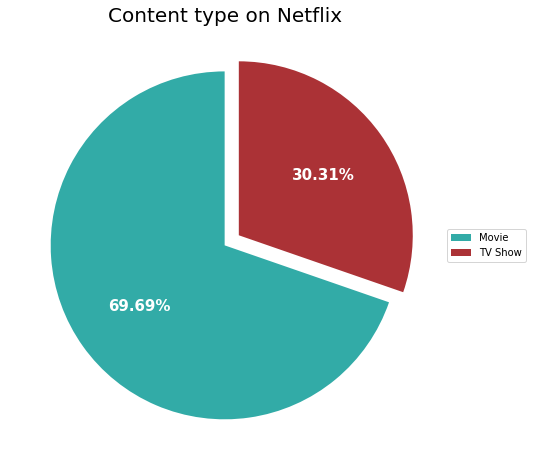

In [29]:
# Group the dataset by type and count each value (amount of movies and TV shows)
type_size = netflix_df.groupby(['type'], dropna=True, as_index=False).size()

# Properties of the pie chart
explode = (0, 0.1)
labels = type_size['type']
colors = ('#32aba7', '#ab3236')

# Initialize figure
fig, ax = plt.subplots(figsize =(10, 8))

wedges, texts, autotexts = ax.pie(type_size['size'], explode=explode, autopct='%1.2f%%', 
                                  startangle=90, colors=colors, textprops=dict(color="w"))

ax.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set text in pie as white and bold
plt.setp(autotexts, size=15, weight="bold")

ax.set_title('Content type on Netflix', size=20)

plt.show()

There are some records where "country" has multiple values, since some movies and TV shows are created in several countries. Hence, we need to preprocess it to obtain the correct amount:

In [51]:
# Make sure all values are in one string separated by a coma
country_join = ','.join(netflix_df['country'])
# Make sure there are no extra spaces and split values by the comas, then count them
country_count = Counter(country_join.replace(' ,',',').replace(', ',',').split(','))
# Turn it into a data series and sort the values
country_count = pd.Series(dict(country_count)).sort_values(ascending=False)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Change these comments to obtain Top 5 or Top 10 respectively

# Take the top 4 values
topcountry = country_count.head(4)

# Take the top 9 values
#topcountry = country_count.head(9)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Sum the rest of values
country_sum = pd.Series(dict({'Other': country_count.loc[country_count < topcountry.min()].sum()}))
# Append to series
topcountry = topcountry.append(country_sum)
topcountry

United States     3681
India             1058
Unknown            817
United Kingdom     805
Canada             445
France             393
Japan              316
Spain              232
South Korea        231
Other             2855
dtype: int64

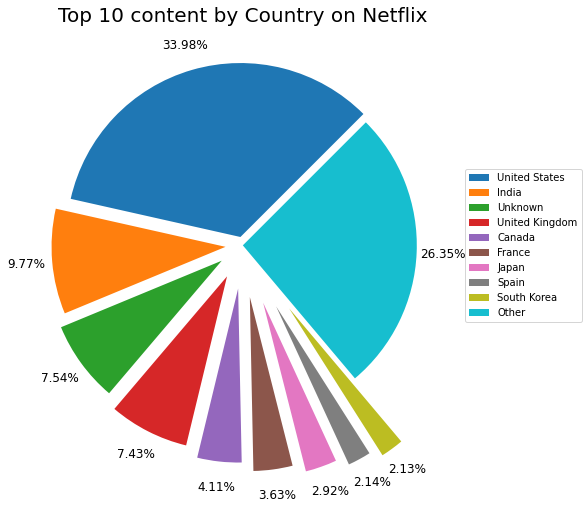

In [52]:
# Properties of the pie chart

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Change these comments to obtain Top 5 or Top 10 respectively

#explode = (0.05, 0.1, 0.15, 0.2, 0.25, 0)
#title = 'Top 5 content by Country on Netflix'

explode = (0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0)
title = 'Top 10 content by Country on Netflix'
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

labels = topcountry.index

# Initialize figure
fig, ax = plt.subplots(figsize =(10, 8))

wedges, texts, autotexts = ax.pie(topcountry, autopct='%1.2f%%', startangle=45, explode = explode, pctdistance=1.15)

ax.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12)

ax.set_title(title, size=20)

plt.show()

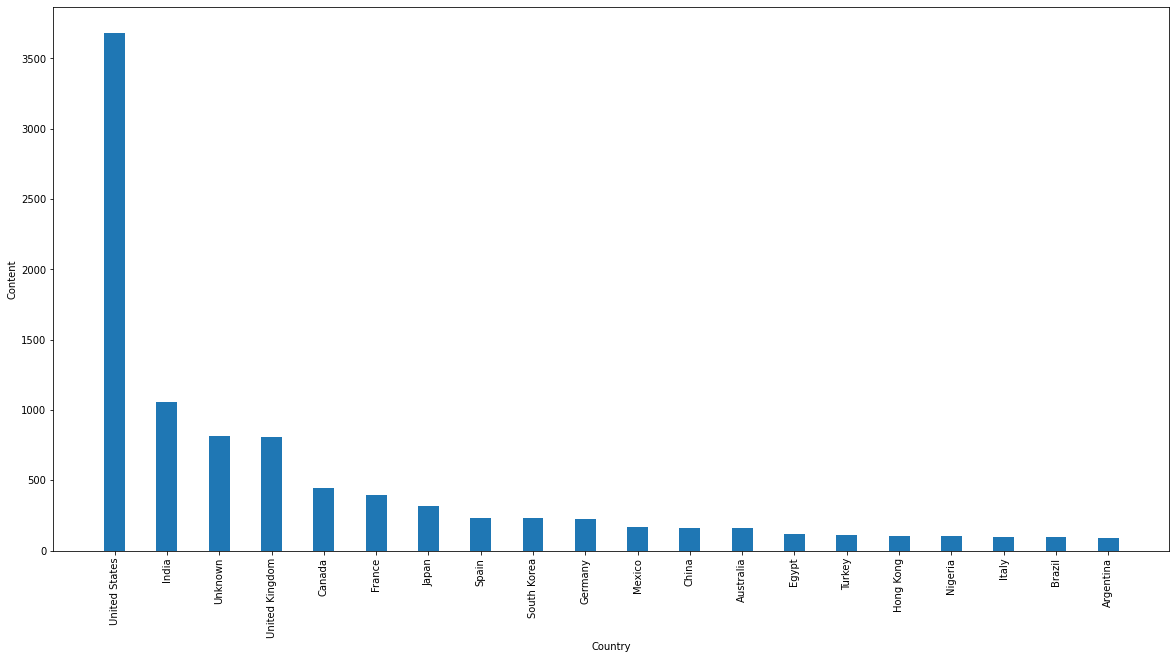

In [32]:
# Select top 20 countries
top20country = country_count.head(20)

fig = plt.figure(figsize = (20, 10))

# creating the bar plot
plt.bar(top20country.index, top20country, width = 0.4)
 
plt.xlabel("Country")
plt.ylabel("Content")
plt.xticks(rotation=90)

ax.set_title('Top 20 content by Country on Netflix', size=20)

plt.show()

Separate the dataframe by type: movies and TV shows.

In [33]:
netflix_shows = netflix_df[netflix_df['type']=='TV Show']
netflix_movies = netflix_df[netflix_df['type']=='Movie']

Obtain amount of content added per year.

In [34]:
year_shows = feature_freq(netflix_shows, 'year_added').sort_values('year_added')
year_movies = feature_freq(netflix_movies, 'year_added').sort_values('year_added')
year_total = feature_freq(netflix_df, 'year_added').sort_values('year_added')

Plot a line chart comparing movies and tv shows evolution over the years:

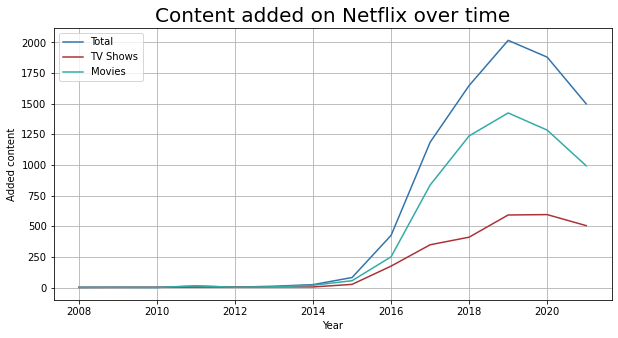

In [35]:
# Plot a line chart comparing movies and tv shows evolution
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(year_total['year_added'], year_total['freq'], label = 'Total', color = '#3273ab')
plt.plot(year_shows['year_added'], year_shows['freq'], label = 'TV Shows', color = '#ab3236')
plt.plot(year_movies['year_added'], year_movies['freq'], label = 'Movies', color = '#32aba7')

plt.xlabel('Year')
plt.ylabel('Added content')
ax.legend()
ax.grid()

ax.set_title('Content added on Netflix over time', size=20)

plt.show()

As stated before, the line plot shows how there was a huge increase of added content on Netflix from 2016 to 2019. Even though movies have a steeper increase, both content types follow a similar behaviour. It's not a huge leap to say that the following decay might be because of the COVID-19 lockdown, since content could not be produced. Nevertheless, that suspicion should be confirmed with more data.

Amount of content per rating:

In [36]:
rating_shows = feature_freq(netflix_shows, 'rating').sort_values('rating', ascending=True)
rating_movies = feature_freq(netflix_movies, 'rating').sort_values('rating', ascending=True)

Merge both dataframes based on the rating values of Movies, since it has more options:

In [37]:
netflix_rating = pd.merge(rating_shows, rating_movies, on='rating', how='right')
netflix_rating.columns = ['rating', 'freq_shows', 'freq_movies']
netflix_rating = netflix_rating.sort_values('freq_movies', ascending=False)
netflix_rating['freq_shows'] = netflix_rating['freq_shows'].fillna(0)

Let's add the total amount of rating as well:

In [38]:
rating_total = feature_freq(netflix_df, 'rating').sort_values('rating', ascending=True)
netflix_rating = pd.merge(netflix_rating, rating_total, on='rating')
netflix_rating

,rating,freq_shows,freq_movies,freq
0,TV-MA,1143.0,2062,3205
1,TV-14,730.0,1427,2157
2,R,2.0,797,799
3,TV-PG,321.0,540,861
4,PG-13,0.0,490,490
5,PG,0.0,287,287
6,TV-Y7,194.0,139,333
7,TV-Y,175.0,131,306
8,TV-G,94.0,126,220
9,NR,4.0,75,79


Plot line comparing the rating of TV shows and Movies:

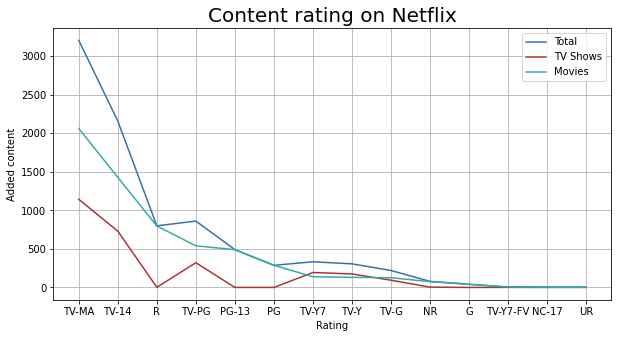

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(netflix_rating['rating'], netflix_rating['freq'], label = 'Total', color = '#3273ab')
plt.plot(netflix_rating['rating'], netflix_rating['freq_shows'], label = 'TV Shows', color = '#ab3236')
plt.plot(netflix_rating['rating'], netflix_rating['freq_movies'], label = 'Movies', color = '#32aba7')

plt.xlabel('Rating')
plt.ylabel('Added content')
ax.legend()
ax.grid()

ax.set_title('Content rating on Netflix', size=20)

plt.show()

Obtain amount of content released per year.

In [40]:
release_shows = feature_freq(netflix_shows, 'release_year').sort_values('release_year')
release_movies = feature_freq(netflix_movies, 'release_year').sort_values('release_year')
release_total = feature_freq(netflix_df, 'release_year').sort_values('release_year')

Plot a line chart comparing movies and tv shows evolution over the years:

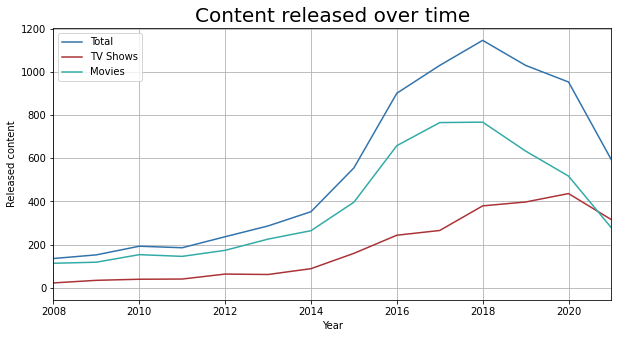

In [41]:
# Plot a line chart comparing movies and tv shows evolution
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(release_total['release_year'], release_total['freq'], label = 'Total', color = '#3273ab')
plt.plot(release_shows['release_year'], release_shows['freq'], label = 'TV Shows', color = '#ab3236')
plt.plot(release_movies['release_year'], release_movies['freq'], label = 'Movies', color = '#32aba7')

plt.xlabel('Year')
plt.ylabel('Released content')
ax.legend()
ax.grid()
plt.xlim([2008, 2021])

ax.set_title('Content released over time', size=20)

plt.show()

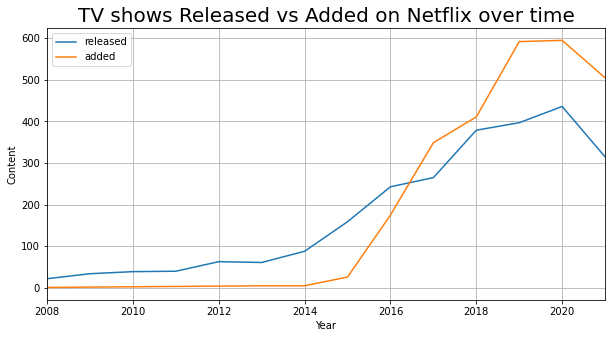

In [42]:
# Plot a line chart comparing movies and tv shows evolution
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(release_shows['release_year'], release_shows['freq'], label = 'released')
plt.plot(year_shows['year_added'], year_shows['freq'], label = 'added')

plt.xlabel('Year')
plt.ylabel('Content')
ax.legend()
ax.grid()
plt.xlim([2008, 2021])

ax.set_title('TV shows Released vs Added on Netflix over time', size=20)

plt.show()

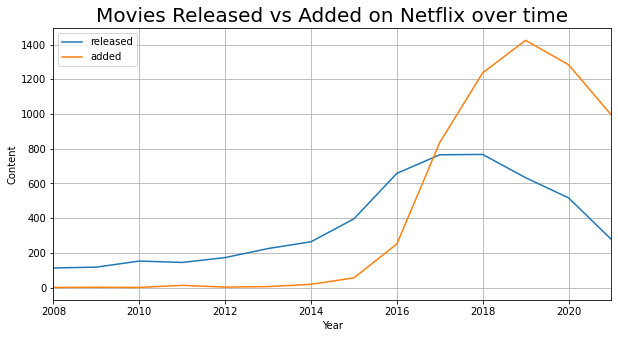

In [43]:
# Plot a line chart comparing movies and tv shows evolution
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(release_movies['release_year'], release_movies['freq'], label = 'released')
plt.plot(year_movies['year_added'], year_movies['freq'], label = 'added')

plt.xlabel('Year')
plt.ylabel('Content')
ax.legend()
ax.grid()
plt.xlim([2008, 2021])

ax.set_title('Movies Released vs Added on Netflix over time', size=20)

plt.show()

The year of release is comparable to the year added on Netflix in the case of TV shows, but not as much in the case of movies.

# Insight Summary

* There are two types of content on Netflix: movies and TV shows.
* The directors with more content on Netflix are Rajiv Chilaka, Raúl Campos and Jan Suter, Marcus Raboy, and Suhas Kadav.
* The actors more frequently cast individually on Netflix are David Attenborough, Samuel West, and Jeff Dunham.
* Most movies on Netflix are from the United States, India, the United Kingdom, and Canada.
* A great number of content was added to Netflix between October 2019 and January 2020.
* There is a huge increase in content added on Netflix from 2016 onwards.
* 2019 is the year in which most titles were added to Netflix.
* 2017, 2018, and 2019 are the years in which most titles were released.
* The majority of titles on Netflix are rated "TV-MA" (> 18 yo), "TV-14" (> 14 yo), "TV-PG" (parental supervision), and "R" (Restricted < 17 yo).
* The majority of titles on Netflix are classified as "Dramas, International Movies", "Documentaries", and "Stand-Up Comedy".
* The majority of titles on Netflix are uploaded in July and December.
* Most TV shows on Netflix end by season 3, and only 8 have more than 10 seasons.
* Most movies have a duration of around 90'-110'.

# Further Analysis

Other plots that can be done:
* Classify the ratings according to age groups, e.g. "little kids", "kids", "teens", "adults".
* Distribution of movie duration and shows seasons.
* World map of content.
* WordCloud of "description".
* Create dashboard.
* Fancier plots with Seaborn and Plotly.

# Author

This Notebook was created by Gemma Lluch on January, 2023.

# Change Log

| Date (YYYY-MM-DD) | Version | Changed By  | Change Description                                   |
| ----------------- | ------- | ----------- | ---------------------------------------------------- |
| 2023-01-16        | 1.2     | Gemma Lluch | Modified markdowns, created index                    |
| 2023-01-15        | 1.1     | Gemma Lluch | Data visualization, insight correction               |
| 2023-01-14        | 1.0     | Gemma Lluch | Data overview, missing values, new features, insight |